In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv(r"C:\Users\USER\Desktop\DemiPC\Lo\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df1 = df.drop(columns = ['Loan_ID'])

In [24]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
df1.shape

(614, 12)

In [26]:
df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
df_clean = df1.dropna()

In [93]:
df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [30]:
df_clean.shape

(480, 12)

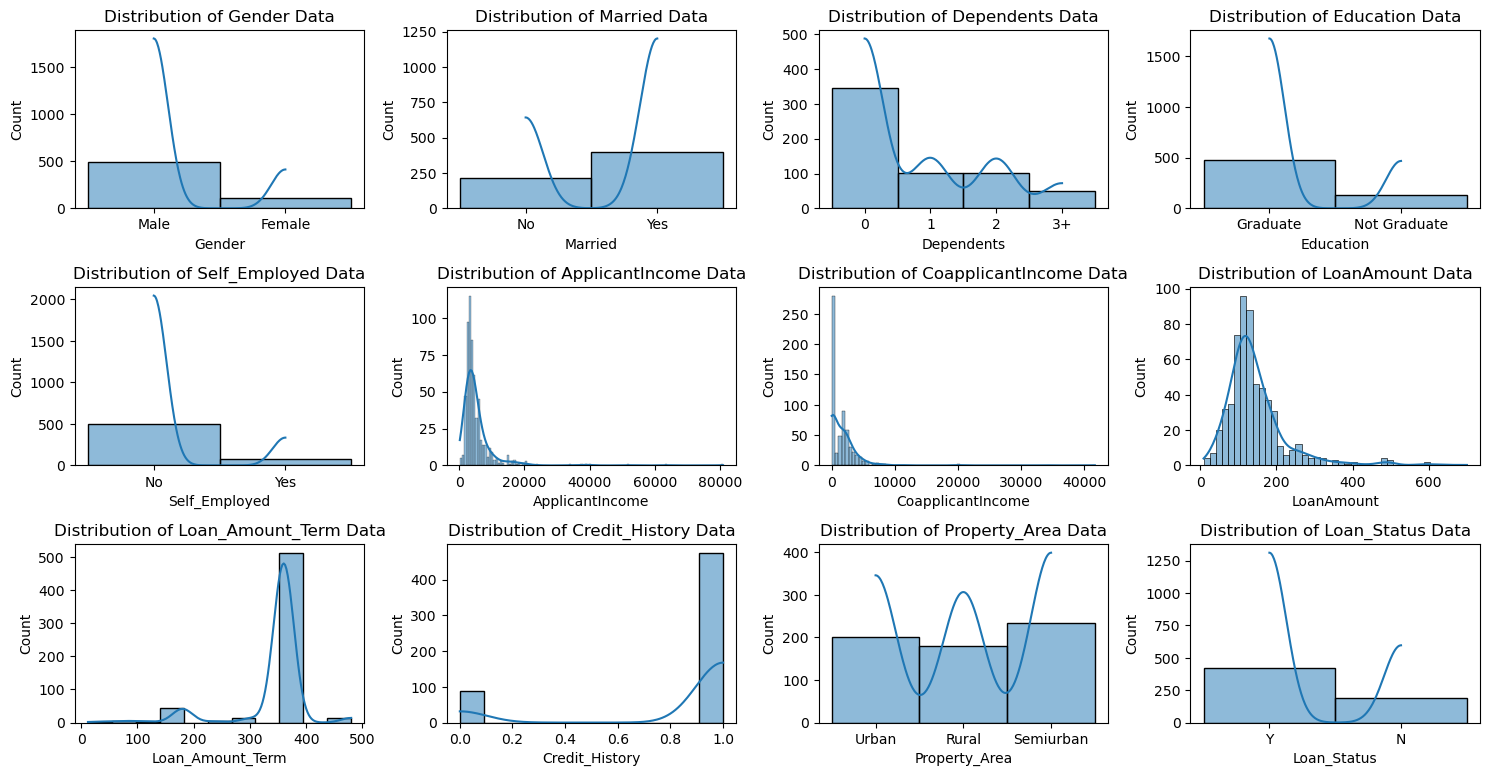

In [39]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_clean.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

[Text(0.5, 1.0, "Distribution of applicant's Gender")]

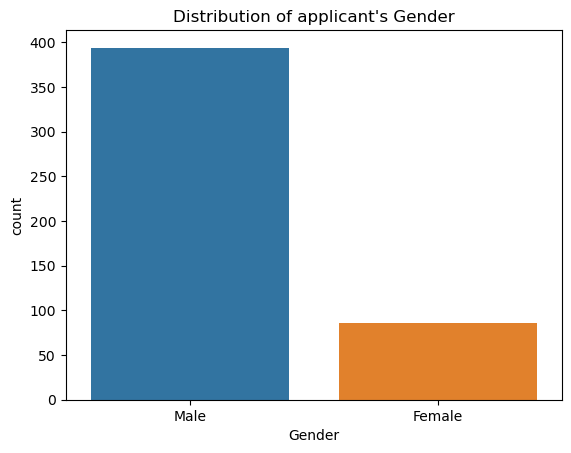

In [51]:
sns.countplot(x = 'Gender', data = df_clean).set(title = "Distribution of applicant's Gender")

[Text(0.5, 1.0, "Distribution of applicant's Educational status")]

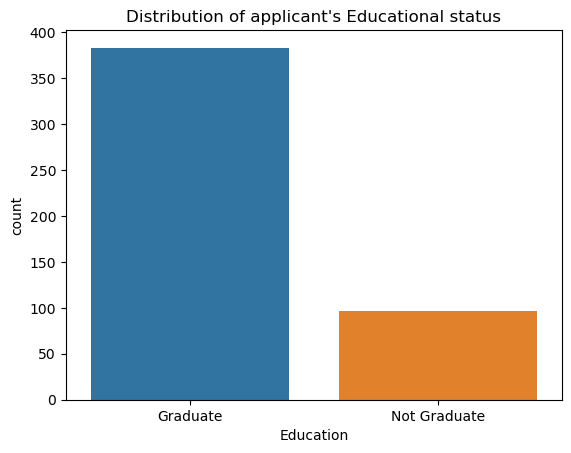

In [52]:
sns.countplot(x = 'Education', data = df_clean).set(title = "Distribution of applicant's Educational status")

[Text(0.5, 1.0, "Distribution of applicant's marital status")]

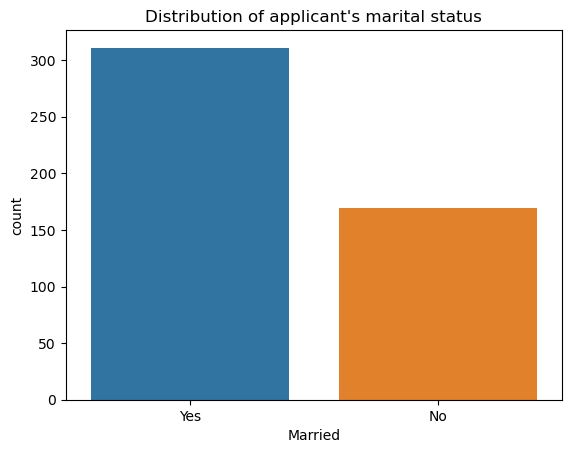

In [53]:
sns.countplot(x = 'Married', data = df_clean).set(title = "Distribution of applicant's marital status")

[Text(0.5, 1.0, "Distribution of applicant's dependents")]

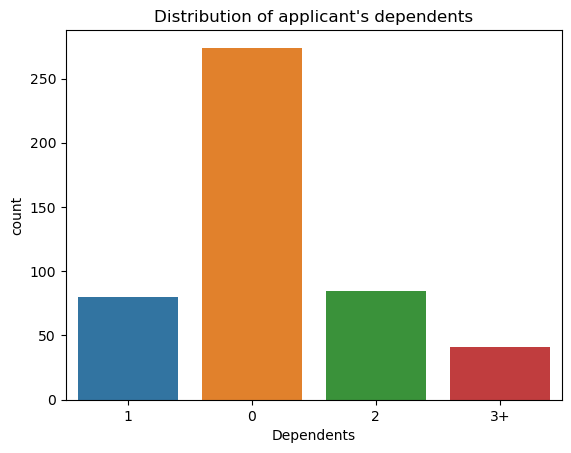

In [54]:
sns.countplot(x = 'Dependents', data = df_clean).set(title = "Distribution of applicant's dependents")

[Text(0.5, 1.0, "Distribution of applicant's employment status")]

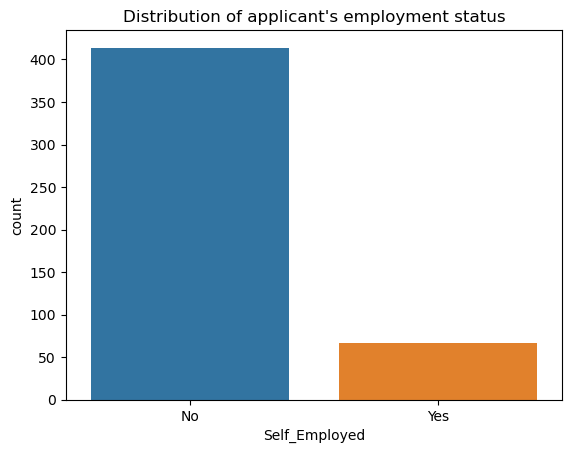

In [56]:
sns.countplot(x = 'Self_Employed', data = df_clean).set(title = "Distribution of applicant's employment status")

[Text(0.5, 1.0, "Distribution of applicant's credit history")]

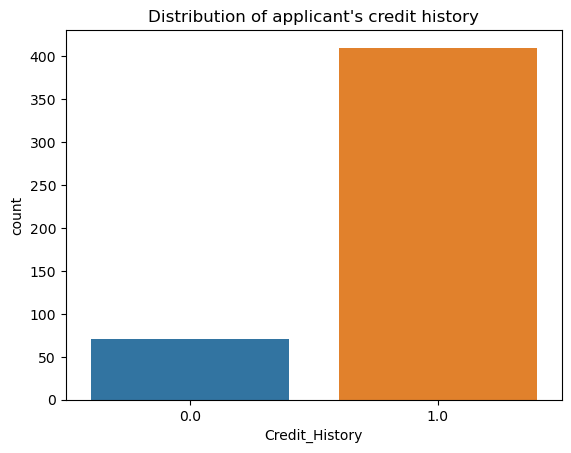

In [58]:
sns.countplot(x = 'Credit_History', data = df_clean).set(title = "Distribution of applicant's credit history")

[Text(0.5, 1.0, "Distribution of applicant's property area")]

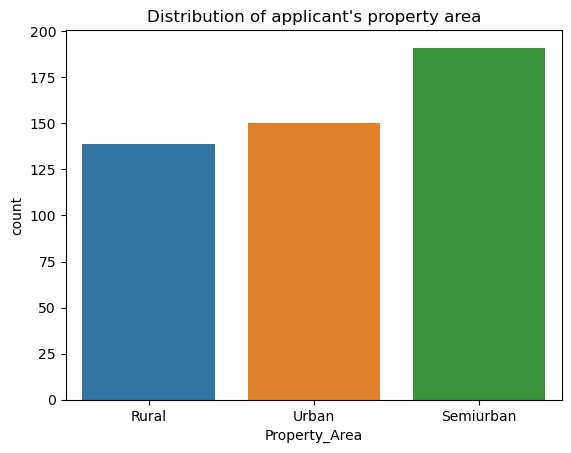

In [59]:
sns.countplot(x = 'Property_Area', data = df_clean).set(title = "Distribution of applicant's property area")

[Text(0.5, 1.0, "Distribution of applicant's Loan status")]

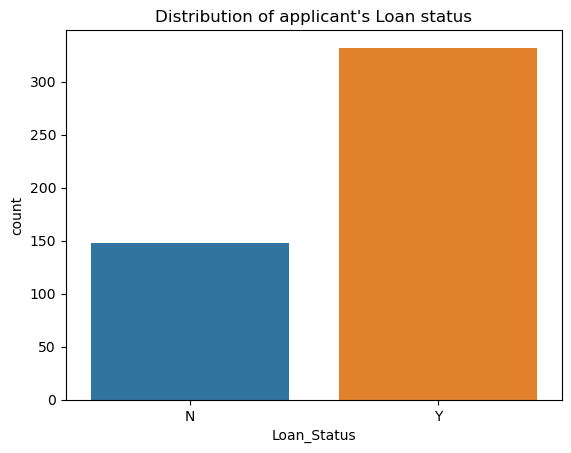

In [60]:
sns.countplot(x = 'Loan_Status', data = df_clean).set(title = "Distribution of applicant's Loan status")

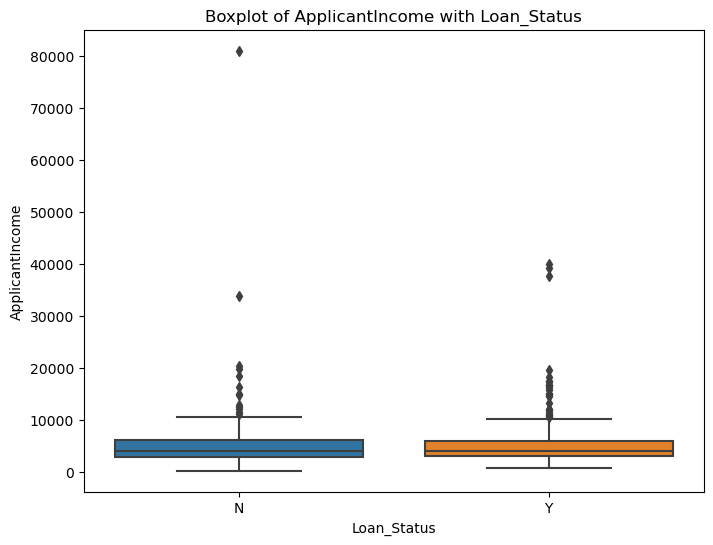

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_clean)
plt.title('Boxplot of ApplicantIncome with Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.show()

<Axes: xlabel='ApplicantIncome'>

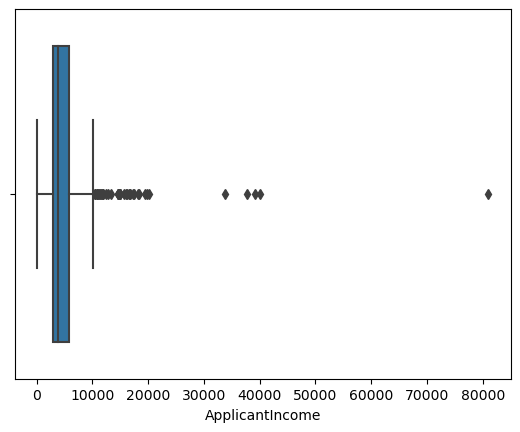

In [44]:
sns.boxplot(x= df_clean['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

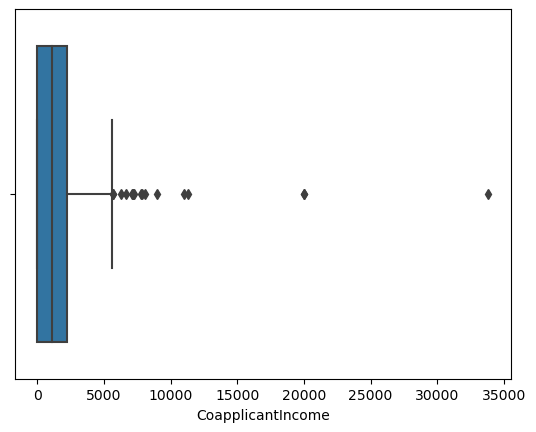

In [45]:
sns.boxplot(x= df_clean['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

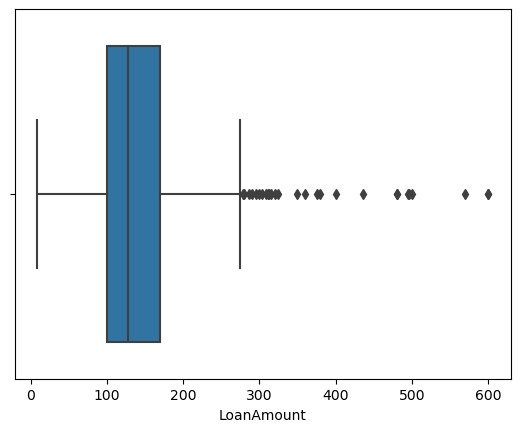

In [46]:
sns.boxplot(x= df_clean['LoanAmount'])

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [95]:
df_clean.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [96]:
df_clean['Gender'] = df_clean['Gender'].map({'Male':1, 'Female': 0})
df_clean['Married'] = df_clean['Married'].map({'Yes':1, 'No': 0})
df_clean['Education'] = df_clean['Education'].map({'Graduate':1, 'Not Graduate': 0})
df_clean['Self_Employed'] = df_clean['Self_Employed'].map({'Yes':1, 'No': 0})
df_clean['Property_Area'] = df_clean['Property_Area'].map({'Rural':0, 'Urban': 1, 'Semiurban': 2})
df_clean['Loan_Status'] = df_clean['Loan_Status'].map({'Y':1, 'N': 0})
df_clean['Dependents'] = df_clean['Dependents'].map({'0':0, '1': 1, '2': 2, '3+': 3})

In [97]:
df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1.0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1.0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,NaN,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1.0,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1.0,1,5417,4196.0,267.0,360.0,1.0,1,1


In [98]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
reg_model = LogisticRegression()

In [101]:
reg_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'LP001273'